In [1]:
#@title Run code to download Kaggle dataset
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download danialsharifrazi/covid19-numeric-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
covid19-numeric-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


i think one our datasets is being changed remotely. got a pop up mentioning it

In [2]:
!ls

covid19-numeric-dataset.zip  dataset2.xlsx  drive  kaggle.json	sample_data


In [3]:
!unzip covid19-numeric-dataset.zip

Archive:  covid19-numeric-dataset.zip
replace dataset2.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset2.xlsx           


In [4]:
!ls

covid19-numeric-dataset.zip  dataset2.xlsx  drive  kaggle.json	sample_data


In [5]:
import pandas as pd
import numpy as np
#dataset1 (imported Kaggle dataset)
df1 = pd.read_excel('dataset2.xlsx')
df1.shape

(319, 39)

In [6]:
#removing columns 
#if it seems important or has positive correlation in another dataset I might keep it instead of omit it

df1 = df1.drop([ 'Traveling in past 3 months ago','Connection with a suspected (covid-19) person','The Infected person ( covid-19)  in family','blood pressure','Chest pain: Diagnosis of stroke or heart disease','Tobacco', ' transplant', 'Conjunctivitis (Pink eye)','Blindness and Tunnel vision','HIV'], axis = 1)
df1.shape

(319, 29)

In [9]:
#checking for non 1 or 0 values
for x in df1:
  for y in df1[x]:
    if y != 1:
      if y != 0:
        print(x)
        print(y)

I do not know if there are unknown values or other. I havent removed them or replaced them with an average.

In [10]:
df = df1

In [11]:
#@title uploading dataframes(files) in google collab to a google drive or editting dataframe(file) already in google drive using google collab
from google.colab import drive
drive.mount('/content/drive')
#connects google drive to collab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
#defines directory path
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
print("dir_path:", dir_path)
#here we are just looking at all the files already in the directory
files = os.listdir(dir_path)  # Gets all the files in directory (dir_path)
print(f"Files in current directory '{dir_path}': {files}") #prints directory path and the files in the directory

dir_path: /content/drive/MyDrive/AI Inspirit/COVID DATASETS
Files in current directory '/content/drive/MyDrive/AI Inspirit/COVID DATASETS': ['ExcelDataset.csv', 'Kaggle_Dataset.csv', 'merged_dataset1.csv']


In [13]:
df.to_csv(dir_path + '/Kaggle_Dataset.csv', index=False) 
#this puts the dataset above into my google drive
# or if already present, will remotely edit the named dataset in my google drive based on the changes I make in the code above

In [14]:
#@title reading google drive files in google collab
#connects to google drive
from google.colab import drive
drive.mount('/content/drive')
#If file has already in my google drive
#using directory path: retrieves and reads file
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df = pd.read_csv(dir_path + '/Kaggle_Dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df.shape

(319, 29)

In [3]:
from sklearn.model_selection import train_test_split
#determining train and test split
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)

In [4]:
#from imblearn.over_sampling import SMOTE
#with smote
#smote = SMOTE(sampling_strategy='minority')
#X = train_df.drop("Death", axis=1)
#y = train_df["Death"]
#X_resampled, y_resampled = smote.fit_resample(X, y)
#assert X_resampled.shape[0] > X.shape[0]
#without smote
X = train_df.drop("Death", axis=1)
y = train_df['Death']

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

In [6]:
#with smote
#model.fit(X_resampled, y_resampled)
#without smote
model.fit(X, y)

LogisticRegression(max_iter=10000)

In [7]:
#testing variables shouldn't be augmented
X_test = test_df.drop("Death", axis=1)
y_test = test_df['Death']

In [8]:
from sklearn.metrics import accuracy_score 
#with smote = 0.765625, without smote = 0.921875 (changes, IDK why)
#without smote & omitted - correlation = 0.921875(less omission)
#with smote & omitted - correlation = 0.890625 or 0.703125(less omission)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.921875


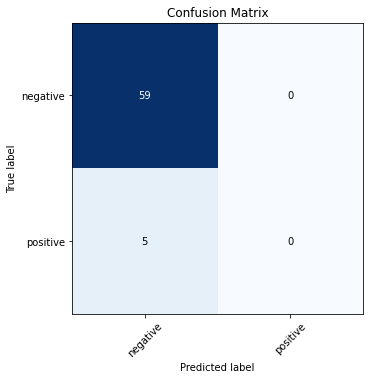

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

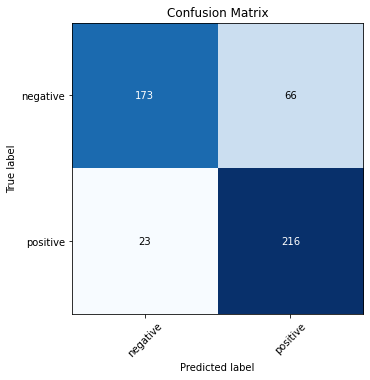

In [58]:
#predictions using model made from  X training values (smote enhanced)
y_trainpred = model.predict(X_resampled)
#using y_resampled values and predictions from X_resampled
cm = confusion_matrix(y_resampled, y_trainpred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

In [16]:
print(df.columns)

Index(['CBC/CRP', 'Diabetes', 'Asthma', 'Heart disease', 'kidney disease',
       'Respiratory disease', 'Cancer', 'Corticosteroids', 'HEM',
       ' Immunodeficiency', 'Liver disease', 'Rheumatological disease',
       ' Chest pain', 'Fever', 'Trembling or Shakes', 'Weakness', 'Sweating',
       'Sore throat', 'dyspnea', 'Dry cough', 'Cough with sputum',
       'Fatigue, whole body hurts', 'Anosmia', 'Ageusia', 'Anorexie', 'Eczema',
       'Vertigo', 'Nausea/Diarrhea', 'Death'],
      dtype='object')


I think there are too little deaths

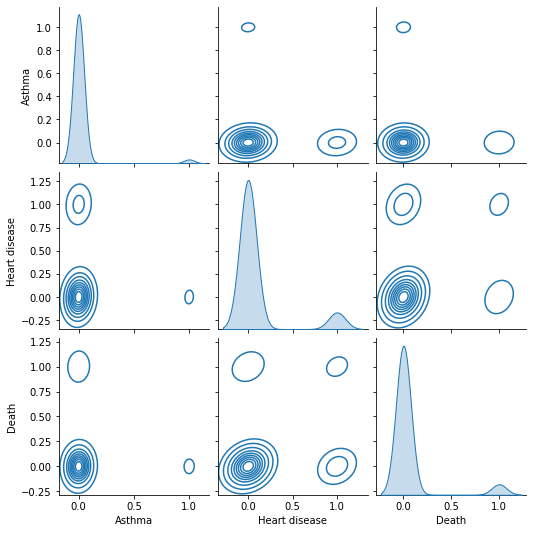

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_pairplot = df[['Asthma','Heart disease','Death']]
sns.pairplot(df_pairplot, kind="kde")
plt.show()

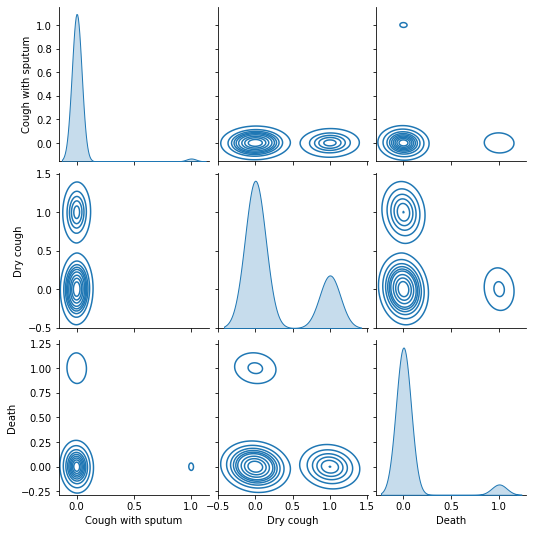

In [ ]:

df_pairplot2 = df[['Cough with sputum','Dry cough','Death']]
sns.pairplot(df_pairplot2, kind="kde")
plt.show()

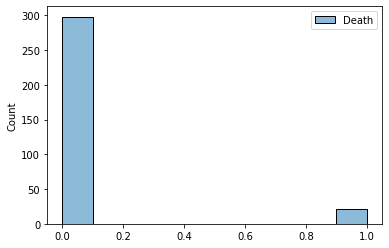

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#Too little death
df_histogram = df[['Death']]
sns.histplot(df_histogram)
plt.show()

In [ ]:
print(df.columns)

Index(['CBC/CRP', 'Traveling in past 3 months ago',
       'Connection with a suspected (covid-19) person', 'Diabetes',
       'blood pressure', 'Asthma', 'Heart disease', 'kidney disease',
       'Respiratory disease', 'Cancer', 'Corticosteroids', 'HIV',
       ' transplant', 'HEM', ' Immunodeficiency', 'Liver disease',
       'Rheumatological disease', ' Chest pain', 'Fever',
       'Trembling or Shakes', 'Weakness', 'Sweating', 'Sore throat', 'dyspnea',
       'Dry cough', 'Cough with sputum', 'Fatigue, whole body hurts',
       'Anosmia', 'Ageusia', 'Anorexie', 'Eczema', 'Conjunctivitis (Pink eye)',
       'Blindness and Tunnel vision', 'Vertigo', 'Nausea/Diarrhea', 'Tobacco',
       'Chest pain: Diagnosis of stroke or heart disease',
       'The Infected person ( covid-19)  in family', 'Death'],
      dtype='object')


In [ ]:
#df.corr()
#sns.heatmap(df.corr(), annot=True)

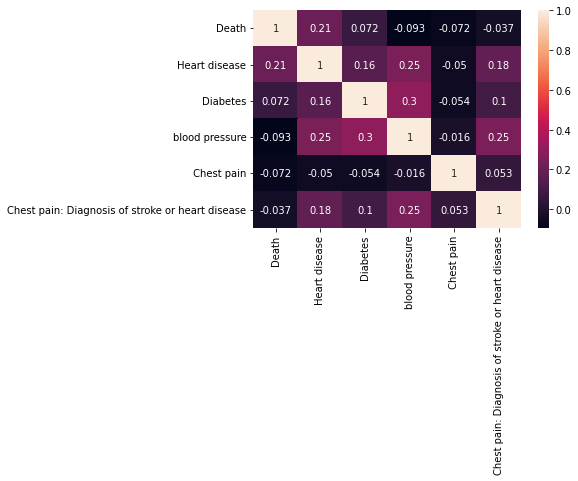

In [ ]:
df[['Death','Heart disease','Diabetes','blood pressure',' Chest pain','Chest pain: Diagnosis of stroke or heart disease']].corr()
sns.heatmap(df[['Death','Heart disease','Diabetes','blood pressure',' Chest pain','Chest pain: Diagnosis of stroke or heart disease']].corr(), annot=True)

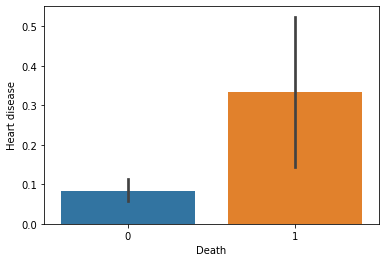

In [ ]:
#more people who died had more heart disease?
sns.barplot(data=df, x='Death', y = 'Heart disease')
plt.show()

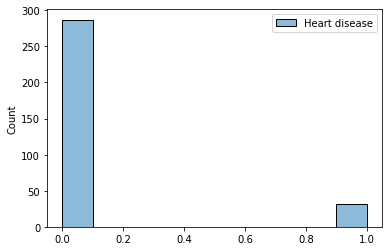

In [ ]:
#more people have the condition than we usually see
df_histogram = df[['Heart disease']]
sns.histplot(df_histogram)
plt.show()

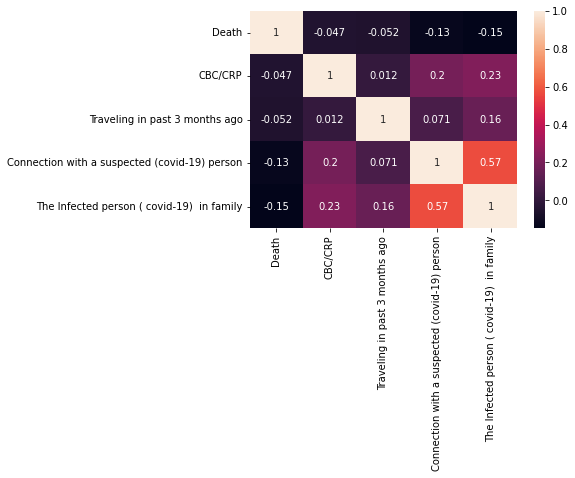

In [ ]:
df[['Death','CBC/CRP', 'Traveling in past 3 months ago','Connection with a suspected (covid-19) person','The Infected person ( covid-19)  in family']].corr()
sns.heatmap(df[['Death','CBC/CRP', 'Traveling in past 3 months ago','Connection with a suspected (covid-19) person','The Infected person ( covid-19)  in family']].corr(), annot=True)

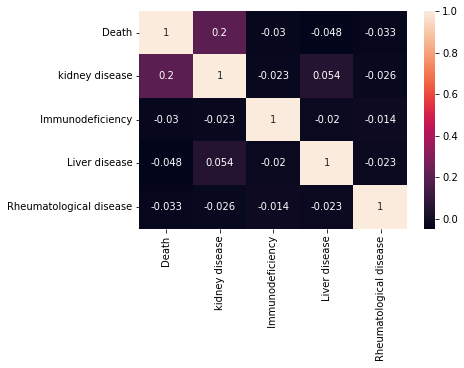

In [ ]:
df[['Death','kidney disease',' Immunodeficiency','Liver disease','Rheumatological disease' ]].corr()
sns.heatmap(df[['Death','kidney disease',' Immunodeficiency','Liver disease','Rheumatological disease' ]].corr(), annot=True)

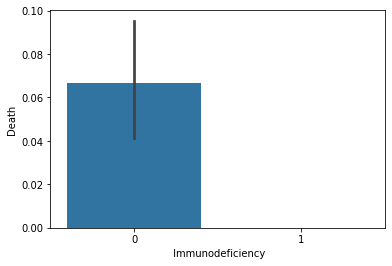

In [ ]:
#nobody really has immunodeficiency or has no effect
sns.barplot(data=df, x=' Immunodeficiency', y = 'Death')
plt.show()

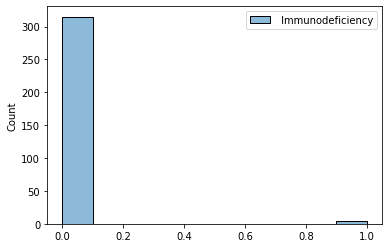

In [ ]:
#little ' Immunodeficiency'
df_histogram = df[[' Immunodeficiency']]
sns.histplot(df_histogram)
plt.show()

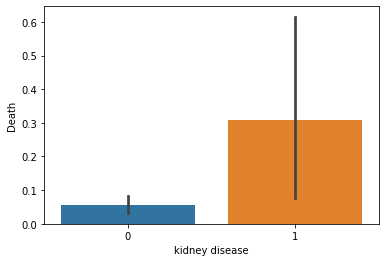

In [ ]:
#more people with kidney diseased died
sns.barplot(data=df, x='kidney disease', y = 'Death')
plt.show()

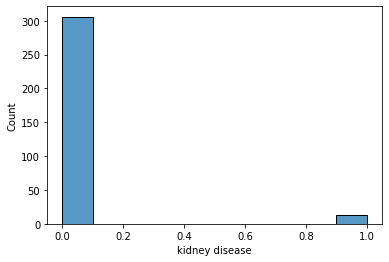

In [ ]:
#not a lot of kidney disease (but more than other conditions)
df_histogram = df['kidney disease']
sns.histplot(df_histogram)
plt.show()

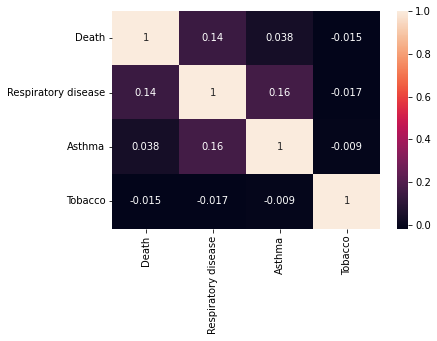

In [ ]:
df[['Death','Respiratory disease','Asthma','Tobacco' ]].corr()
sns.heatmap(df[['Death','Respiratory disease','Asthma','Tobacco' ]].corr(), annot=True)

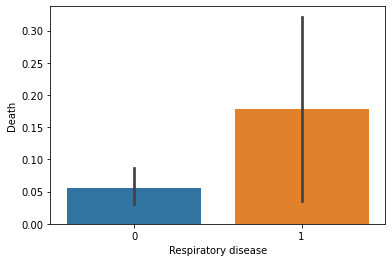

In [ ]:
sns.barplot(data=df, x='Respiratory disease', y = 'Death')
plt.show()

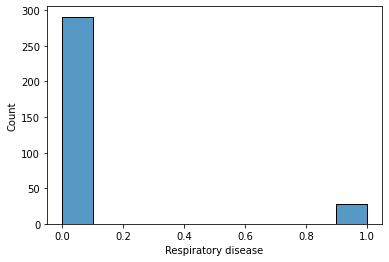

In [ ]:
df_histogram = df['Respiratory disease']
sns.histplot(df_histogram)
plt.show()

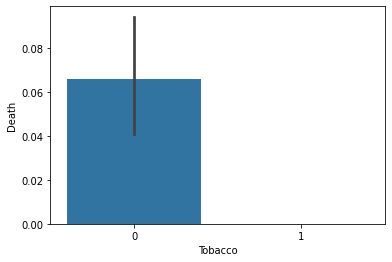

In [ ]:
#no effect or too little
sns.barplot(data=df, x='Tobacco', y = 'Death')
plt.show()

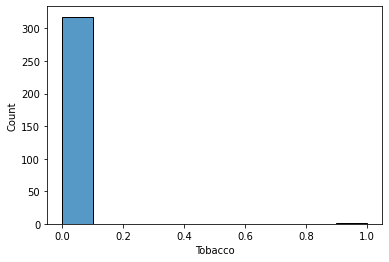

In [ ]:
#too little
df_histogram = df['Tobacco']
sns.histplot(df_histogram)
plt.show()

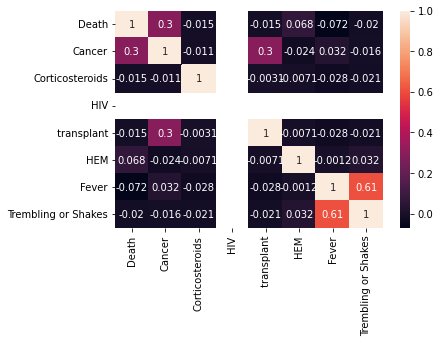

In [ ]:
df[['Death','Cancer', 'Corticosteroids', 'HIV',' transplant', 'HEM','Fever','Trembling or Shakes']].corr()
sns.heatmap(df[['Death','Cancer', 'Corticosteroids', 'HIV',' transplant', 'HEM','Fever','Trembling or Shakes']].corr(), annot=True)

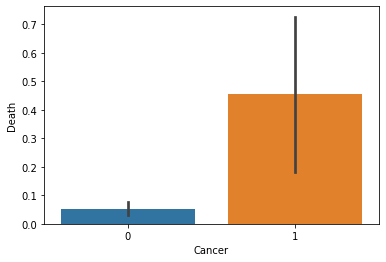

In [ ]:
sns.barplot(data=df, x='Cancer', y = 'Death')
plt.show()

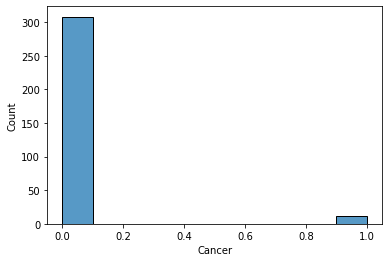

In [ ]:
df_histogram = df['Cancer']
sns.histplot(df_histogram)
plt.show()

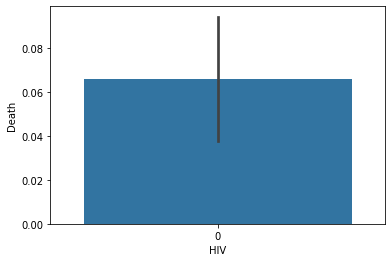

In [ ]:
sns.barplot(data=df, x='HIV', y = 'Death')
plt.show()

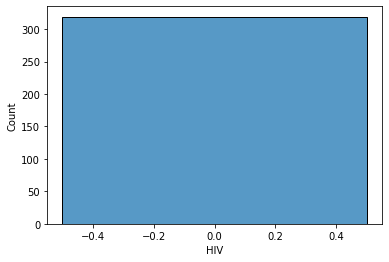

In [ ]:
df_histogram = df['HIV']
sns.histplot(df_histogram)
plt.show()

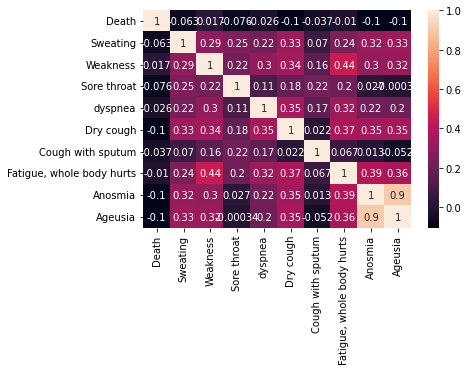

In [ ]:
df[['Death','Sweating','Weakness','Sore throat', 'dyspnea','Dry cough', 'Cough with sputum', 'Fatigue, whole body hurts','Anosmia', 'Ageusia']].corr()
sns.heatmap(df[['Death','Sweating','Weakness','Sore throat', 'dyspnea','Dry cough', 'Cough with sputum', 'Fatigue, whole body hurts','Anosmia', 'Ageusia']].corr(), annot=True)

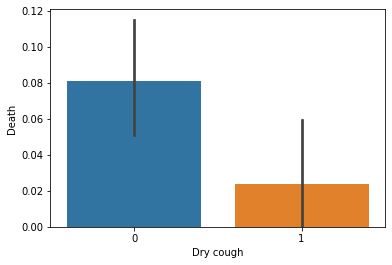

In [ ]:
sns.barplot(data=df, x='Dry cough', y = 'Death')
plt.show()

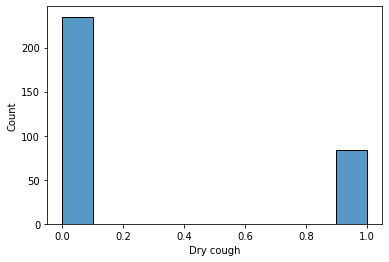

In [ ]:
df_histogram = df['Dry cough']
sns.histplot(df_histogram)
plt.show()

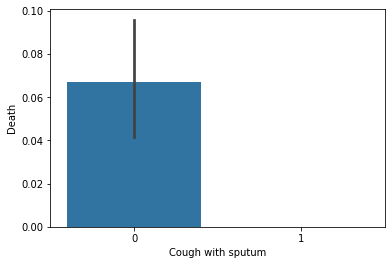

In [ ]:
sns.barplot(data=df, x='Cough with sputum', y = 'Death')
plt.show()

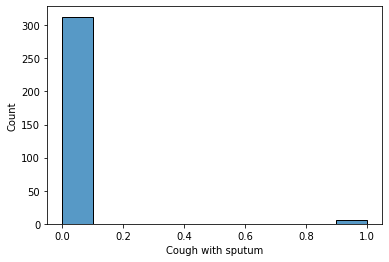

In [ ]:
#too little
df_histogram = df['Cough with sputum']
sns.histplot(df_histogram)
plt.show()

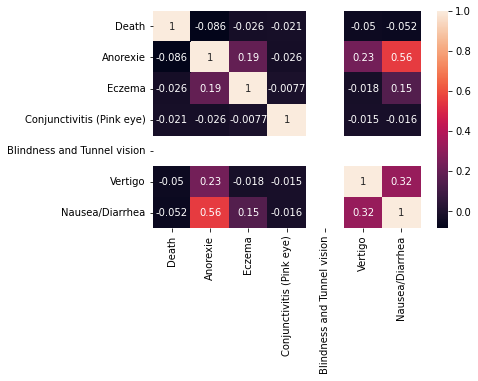

In [ ]:
df[['Death','Anorexie', 'Eczema', 'Conjunctivitis (Pink eye)','Blindness and Tunnel vision', 'Vertigo', 'Nausea/Diarrhea']].corr()
sns.heatmap(df[['Death','Anorexie', 'Eczema', 'Conjunctivitis (Pink eye)','Blindness and Tunnel vision', 'Vertigo', 'Nausea/Diarrhea']].corr(), annot=True)

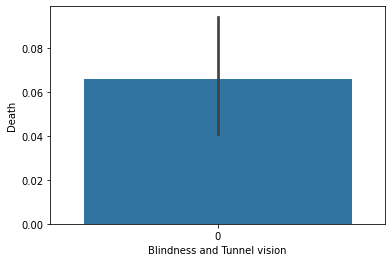

In [ ]:
sns.barplot(data=df, x='Blindness and Tunnel vision', y = 'Death')
plt.show()

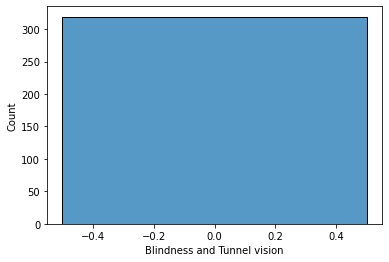

In [ ]:
df_histogram = df['Blindness and Tunnel vision']
sns.histplot(df_histogram)
plt.show()